### Importing Libraries

In [314]:
import pandas as pd
import numpy as np
from sklearn import metrics 
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# print(plt.style.available)

&nbsp;

&nbsp;

### Sample Data

In [316]:
X = [[-2,2.6],[2,3.2],[1.6,3],[1.6,1.9],[1.9,2.4],[2.2,2.6],[2.4,2.2],[1.6,2.4],
     [3.5,3.8],[5,5],[5,5.5],[5,6],[5,6.2],[4,5],[4,5.5],[4.5,6],[4.2,6.2],[4.5,4.8],[4.5,5.2]]
print(X)

[[-2, 2.6], [2, 3.2], [1.6, 3], [1.6, 1.9], [1.9, 2.4], [2.2, 2.6], [2.4, 2.2], [1.6, 2.4], [3.5, 3.8], [5, 5], [5, 5.5], [5, 6], [5, 6.2], [4, 5], [4, 5.5], [4.5, 6], [4.2, 6.2], [4.5, 4.8], [4.5, 5.2]]


&nbsp;

&nbsp;

### Preprocessing(Scaling : Getting features on same scale)

In [322]:
X_1 = StandardScaler().fit_transform(X)

x = [X_1.tolist()[i][0] for i in range(len(X_1.tolist()))]
y = [X_1.tolist()[i][1] for i in range(len(X_1.tolist()))]
print('=='*20)
print('X-axis values :')
print('=='*20)
print(x,'\n')
print('=='*20)
print('Y-axis values :')
print('=='*20)
print(y)

x_original = [X[i][0] for i in range(len(X))]
y_original = [X[i][1] for i in range(len(X))]
df = pd.DataFrame({'X':x,'Y':y,'x_original':x_original,'y_original':y_original})

X-axis values :
[-2.9201115955562704, -0.6670305675128536, -0.8923386703171953, -0.8923386703171953, -0.7233575932139391, -0.5543765161106827, -0.441722464708512, -0.8923386703171953, 0.1778748180034277, 1.022780203519709, 1.022780203519709, 1.022780203519709, 1.022780203519709, 0.45950994650885485, 0.45950994650885485, 0.741145075014282, 0.5721639979110258, 0.741145075014282, 0.741145075014282] 

Y-axis values :
[-1.0412046471353709, -0.6468613588515426, -0.7783091216128188, -1.5012718167998373, -1.172652409896647, -1.0412046471353709, -1.304100172657923, -1.172652409896647, -0.25251807056771464, 0.5361685059999419, 0.8647879129031322, 1.1934073198063224, 1.3248550825675987, 0.5361685059999419, 0.8647879129031322, 1.1934073198063224, 1.3248550825675987, 0.4047207432386658, 0.6676162687612182]


&nbsp;

&nbsp;

### Visualizing Sample Data

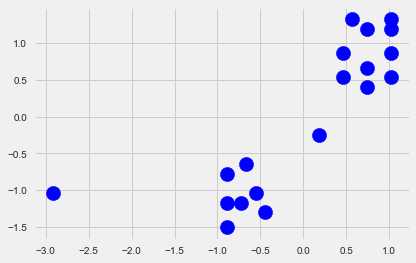

In [327]:
fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(6,4))

axes.scatter(x,y,marker='o',color='blue',s=200)

#### Key Note:
* As this is example 2dimensional real data, we can see here that, there are two dense regions & two isolated data points.
* These two dense regions are two good clusters.
* Our <span style='background:yellow'>DBSCAN(i.e.,Density Based spatial Clustering Of Application With Noise) algorithm</span> tries to find this dense regions and makes clusters of these dense region data points.

&nbsp;

&nbsp;

### Distance Calculation(From each point to its 2nd nearest neighbour: as we took min points as 2)

In [328]:
df_result = pd.DataFrame({'Point_from':[],'Point_to':[],'Distance':[]})
temp = pd.DataFrame({'Point_from':[],'Point_to':[],'Distance':[]})
min_points = 2
current = []
distance = []
for i in range(len(X)):
    current = X[i]
    for j in range(len(X)):
        next_ = X[j]
        if str(current) != str(next_):
            dist = round(math.sqrt(sum([(a - b) ** 2 for a, b in zip(current, next_)])),3)
            distance.append(dist)
            temp.loc[j-1,'Point_from'] = str(current)
            temp.loc[j-1,'Point_to'] = str(next_)
            temp.loc[j-1,'Distance'] = dist
            temp = temp.sort_values(by=['Distance'], ascending=True)
            temp.reset_index(drop=True, inplace=True)
    #print(distance)
    #print(temp)
    df_result.loc[i,'Point_from'] = str(current)
    df_result.loc[i,'Point_to'] = str(temp['Point_to'][min_points-1])
    df_result.loc[i,'Distance'] = str(temp['Distance'][min_points-1])

df_result = df_result.sort_values(by=['Distance'], ascending=True)
df_result.reset_index(drop=True, inplace=True)
df_result

,Point_from,Point_to,Distance
0,"[1.9, 2.4]","[2.2, 2.6]",0.361
1,"[2.2, 2.6]","[1.9, 2.4]",0.361
2,"[2.4, 2.2]","[2.2, 2.6]",0.447
3,"[1.6, 2.4]","[2.2, 2.6]",0.447
4,"[4.5, 5.2]","[4, 5]",0.5
5,"[4.2, 6.2]","[4, 5]",0.5
6,"[4.5, 6]","[4, 5]",0.5
7,"[4, 5.5]","[4, 5]",0.5
8,"[4, 5]","[4, 5.5]",0.5
9,"[4.5, 4.8]","[4, 5]",0.5


#### Key Note:
* In order to find optimal hyper parameters i.e.,(Min points & Epsilon:radius length of circle to find core/border/noise point), first we need to calculate all distances between each data point to its nth nearest neighbour data point(that nth  is considered as min points according to rule of thumb).
* This makes sense because, in case of noise data points distance with their nth nearest neighbour data point is large i.e., if noise data point is far even from its nearest neighbour, then that value can be considered as (min points) in order to find dense data points region for cluster formation(i.e,points near to each other, away from noise data points).
* So, we tries to find all data points distance with its nth nearest neighbour data point and sorts data points in increasing order of their distances. Here noise data points shows high distance with its nearest neighbour data points, so the distance where sudden increase exist(elbow point) means that is noise data point, that distance value can be considered as epsilon(radius length of circle for finding core,neighbour,noise data points)using that we can know which points are densly near points and noisy far points.
* So both min points & epsilon are inconnected to find dense data points and noise sparse data points.
* In DBSCAN, hyper parameters(Min points & Epsilon) are proposed mostly by business domain expert.
* As it is inter linked to each other both hyper parameters are very sensitive, even in slight wrong value clusters formation totally changed.

&nbsp;

&nbsp;

### Hyper Parameter Optimization

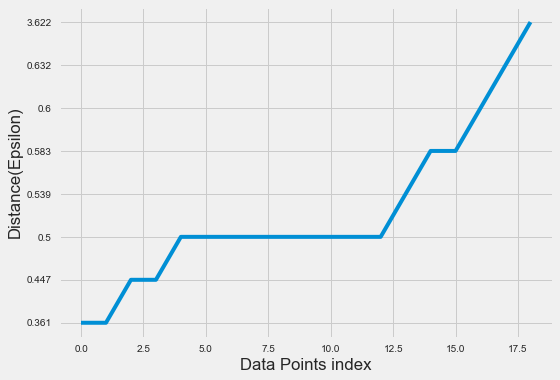

In [329]:
plt.figure()
plt.plot(df_result.index, df_result['Distance'])
plt.xlabel("Data Points index")
plt.ylabel("Distance(Epsilon)")
plt.tight_layout()
plt.show()

#### Key Note:
* By seeing sample data scatter plot, we know min data points=2 makes sense, becuase as noisy data point having its 2nd nearest data point as far, so its distance is high(peak/elbow).
* using that distance(which is value epsilon=0.5) & min points=2, DBSCAN able to find dense and sparse regions and formed clusters correctly.

&nbsp;

&nbsp;

### Model Fit

In [323]:
# Compute DBSCAN
db = DBSCAN(eps=0.5, min_samples=2).fit(X)

&nbsp;

&nbsp;

### Predicting Clusters

In [330]:
#Predict clusters
clusters = pd.DataFrame(db.fit_predict(df[['X','Y']]))
df['Cluster'] = clusters
df

,X,Y,x_original,y_original,Cluster
0,-2.920112,-1.041205,-2.0,2.6,-1
1,-0.667031,-0.646861,2.0,3.2,0
2,-0.892339,-0.778309,1.6,3.0,0
3,-0.892339,-1.501272,1.6,1.9,0
4,-0.723358,-1.172652,1.9,2.4,0
5,-0.554377,-1.041205,2.2,2.6,0
6,-0.441722,-1.304100,2.4,2.2,0
7,-0.892339,-1.172652,1.6,2.4,0
8,0.177875,-0.252518,3.5,3.8,-1
9,1.022780,0.536169,5.0,5.0,1


#### Key Note:
* -1 are noisy data points labeled by DBSCAN.
* Here, 0 & 1 are other two clusters formed.
* As we know according to algorithm steps, its take a data point and find its nearest dense data point(having dist < epsilon) and makes both of them into one cluster.
* Once these, one dense region connected points are labelled as cluster, its starts labelling other cluster in other dense region connected data points < epsilon.
* Note : As one dense regoin connected points is far from other dense region connected points(which is > epsilon), DBSCAN properly able to distinguish this & to check dense connected data points and labelling as clusters.


&nbsp;

&nbsp;

### Visualizing Clusters

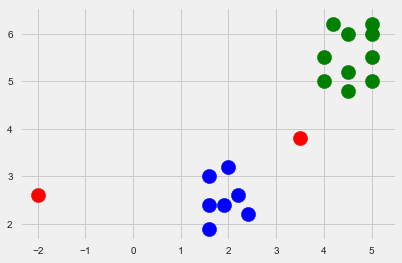

In [326]:
plt.style.use('fivethirtyeight') 

fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(6,4))

axes.scatter(-2,2.6,marker='o',color='red',s=200)

axes.scatter(1.6,3,marker='o',color='blue',s=200)
axes.scatter(1.6,1.9,marker='o',color='blue',s=200)
axes.scatter(2,3.2,marker='o',color='blue',s=200)
axes.scatter(1.9,2.4,marker='o',color='blue',s=200)
axes.scatter(2.2,2.6,marker='o',color='blue',s=200)
axes.scatter(2.4,2.2,marker='o',color='blue',s=200)
axes.scatter(1.6,2.4,marker='o',color='blue',s=200)

# axes.scatter(3.2,3.4,marker='o',color='yellow',s=200)
axes.scatter(3.5,3.8,marker='o',color='red',s=200)

axes.scatter(5,5,marker='o',color='green',s=200)
axes.scatter(5,5.5,marker='o',color='green',s=200)
axes.scatter(5,6,marker='o',color='green',s=200)
axes.scatter(5,6.2,marker='o',color='green',s=200)
axes.scatter(4,5,marker='o',color='green',s=200)
axes.scatter(4,5.5,marker='o',color='green',s=200)
axes.scatter(4.5,6,marker='o',color='green',s=200)
axes.scatter(4.2,6.2,marker='o',color='green',s=200)
axes.scatter(4.5,4.8,marker='o',color='green',s=200)
axes.scatter(4.5,5.2,marker='o',color='green',s=200)